# Nelinearne jednadžbe

---

__Problem.__ Nađimo nul-točke funkcije $f(x)$ na zatvorenom intervalu $[a,b]$, odnosno, riješimo jednadžbu

$$
f(x)=0, \quad x\in[a,b]. \tag{1}
$$

Vrijedi sljedeće:

Ako je $f$ __neprekidna__ na $[a,b]$ i ako je $f(a)\cdot f(b)<0$, tada postoji barem jedna točka $\xi\in(a,b)$ takva da je 

$$
f(\xi)=0.
$$

Ako je još i $f'(x)\neq 0$ za $x\in(a,b)$, tada je $\xi$ __jedinstvena__.

Stoga jednadžbu (1) možemo riješiti u dva koraka:

1. Nađemo interval $[a,b]$ u kojem funkcija $f$ ima jedinstvenu nultočku $\xi$,
2. Aproksimiramo točku $\xi$ s unaprijed zadanom točnošću.

Opisat ćemo četiri metode:

1. metodu bisekcije,
2. metodu jednostavih iteracija,
3. Newtonovu metodu (metodu tangente) i 
4. metodu sekante.

Sve metode, uz zadanu početnu aproksimaciju $x_0$,  generiraju niz točaka $x_n$ koji, uz određene uvjete, konvergira
prema rješenju $\xi$. 

Metoda ima __red konvergencije__ jednak $r>0$ ako postoji $A>0$ takav da je

$$
|\xi-x_{n+1}|\leq A|\xi-x_n|^r.
$$

__Napomena.__ Dokazi tvrdnji se nalaze u knjizi [Numerička matematika, poglavlje 4.1][RS04]. Brojevi primjera se odnose na isto poglavlje.

[RS04]: http://www.mathos.unios.hr/pim/Materijali/Num.pdf "R. Scitovski, 'Numerička matematika', Sveučilište u Osijeku, Osijek, 2004."

## Bisekcija

Počevši od intervala $[a,b]\equiv [a_0,b_0]$, konstruiramo niz intervala 

$$
[a_0,b_0]\supset [a_1,b_1]\supset [a_2,b_2]\supset [a_3,b_3] \supset \cdots,
$$

gdje je $f(a_n)\cdot f(b_n)\leq 0$, i niz točaka

$$
x_{n+1}=\frac{a_n+b_n}{2}.
$$

__Brzina konvergencije__ je __linearna__ jer je 

$$
|\xi-x_{n+1}|\leq \frac{1}{2}|\xi-x_n|,
$$

a __pogreška aproksimacije__ je omeđena s

$$
|\xi-x_{n+1}|\leq \frac{1}{2}|a_n-b_n|.
$$

In [1]:
using Plots

In [2]:
function Bisection(f::Function,a::Number,b::Number,ϵ::Float64=1e-10)
    fa=f(a)
    fb=f(b)
    T=Float64
    x=T
    fx=T
    if fa*fb>zero(T)
        return "Netočan interval"
    end
    iter=0
    while b-a>ϵ && iter<1000
        x=(b+a)/2.0
        fx=f(x)
        if fa*fx<zero(T)
            b=x
            fb=fx
        else
            a=x
            fa=fx
        end
        iter+=1
        # @show x,fx
    end
    return x,fx,iter
end

Bisection (generic function with 2 methods)

### Primjeri

Zadane su funkcije i intervali:

\begin{align}
f_1(x)&=e^x-x- \frac{5}{4},\quad &x\in [-2,2],\\
f_2(x)&=e^{-2x}\sin (6x)-\frac{2}{3}\,x-\frac{1}{2},\quad &x\in[-1,2],\\
f_3(x)&=x^3-6x+2,\quad &x\in[-4,4],\\
f_4(x)&=0.001\,x+0.5+\frac{\pi}{2}+\arctan(x),\quad &x\in[-1000,1000], \tag{a}\\
f_5(x)&=1000\,(x-4)-e^x,\quad &x\in[-10,10]. \tag{b}
\end{align}

In [3]:
f₁(x)=exp(x)-x-5.0/4
(a₁,b₁)=(-1,1)
f₂(x)=exp(-2x)*sin(6x)+2x/3-1.0/2
(a₂,b₂)=(-1,2)
f₃(x)=x^3-6*x+2
(a₃,b₃)=(-4,4)
f₄(x)=0.001x+0.5+π/2+atan(x)
(a₄,b₄)=(-1000,1000)
f₅(x)=1000(x-4)-exp(x)
(a₅,b₅)=(-10,10)

(-10, 10)

Pomoću grafa funkcije odredimo intervale u kojima se nalaze nul-točke, koje potom izračunamo i nacrtamo.

In [4]:
function NulTočke(f,a,b,Intervali)
    plot(f,a,b,label="f(x)")
    for i=1:length(Intervali)
        iab=Intervali[i]
        x,y,iter=Bisection(f,iab[1],iab[2])
        scatter!([x],[y],label="Nul-točka")
    end
    scatter!()
end

NulTočke (generic function with 1 method)

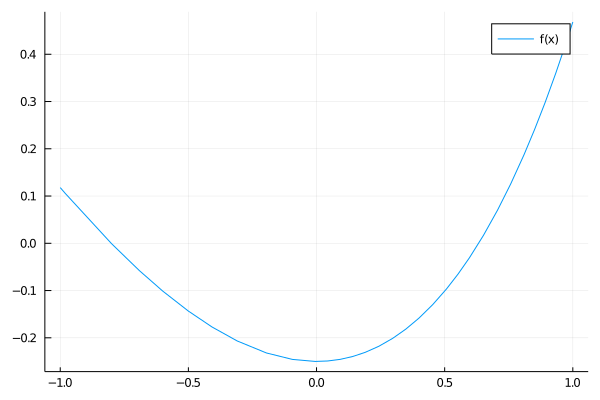

In [5]:
# Funkcija f₁(x)
plot(f₁,a₁,b₁,label="f(x)")

In [6]:
Intervali₁=((-1,0),(0,1))

((-1, 0), (0, 1))

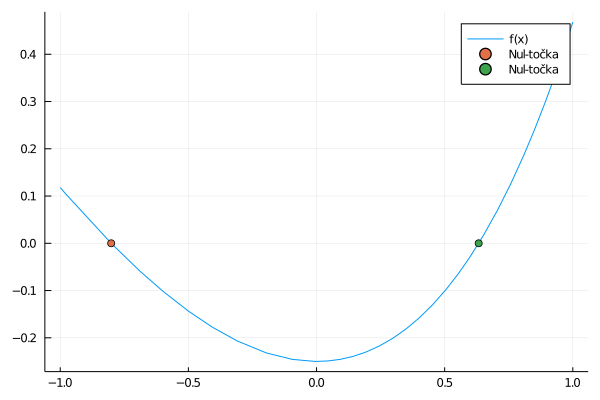

In [7]:
NulTočke(f₁,a₁,b₁,Intervali₁)

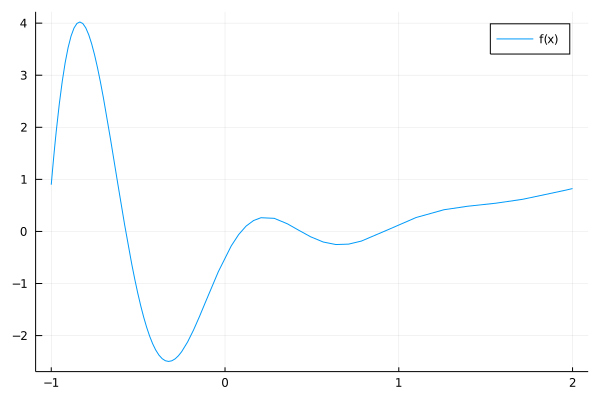

In [8]:
# Funkcija f₂(x)
plot(f₂,a₂,b₂,label="f(x)")

In [9]:
Intervali₂=((-1,-0.4),(-0.4,0.2),(0.2,0.6),(0.6,1))

((-1, -0.4), (-0.4, 0.2), (0.2, 0.6), (0.6, 1))

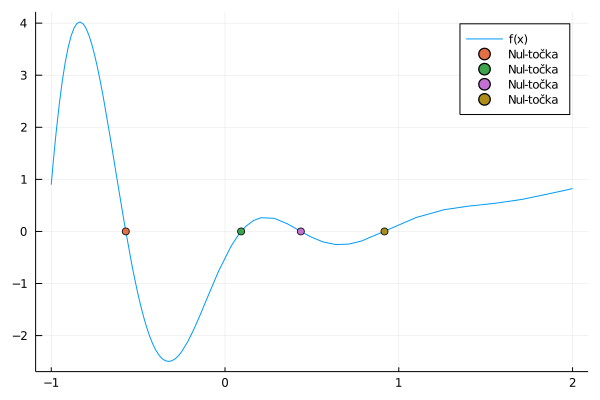

In [10]:
NulTočke(f₂,a₂,b₂,Intervali₂)

In [11]:
# Računanje jedne nultočke
Bisection(f₂,0.2,0.6)

(0.43623168515041455, 3.7064906699413314e-11, 32)

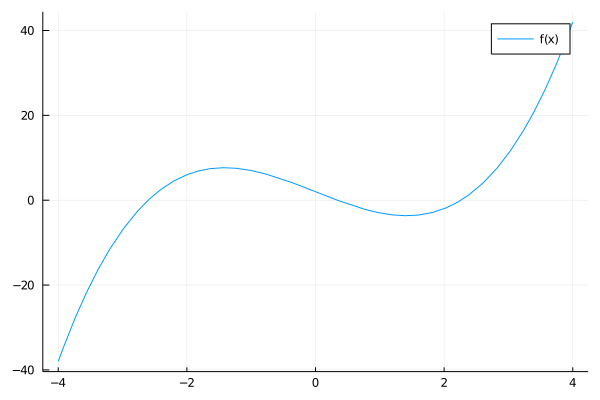

In [12]:
# Funkcija f₃(x)
plot(f₃,a₃,b₃,label="f(x)")

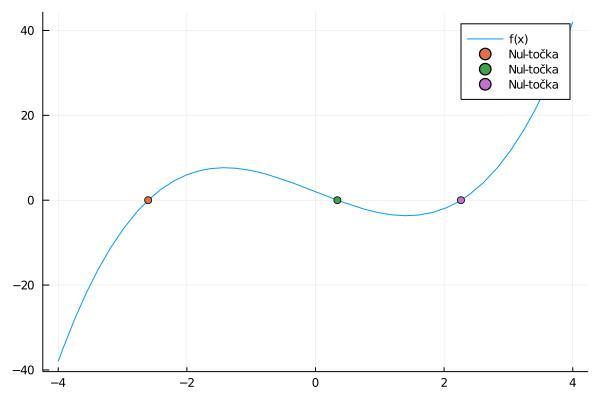

In [13]:
Intervali₃=((-4,-2),(0,1),(2,3))
NulTočke(f₃,a₃,b₃,Intervali₃)

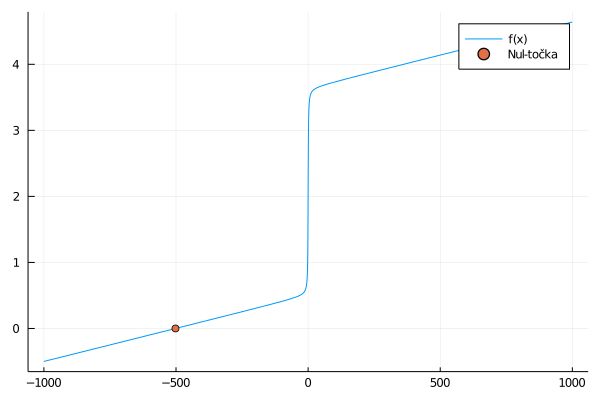

In [14]:
# Funkcija f₄(x)
Intervali₄=[(-600,-400)]
NulTočke(f₄,a₄,b₄,Intervali₄)

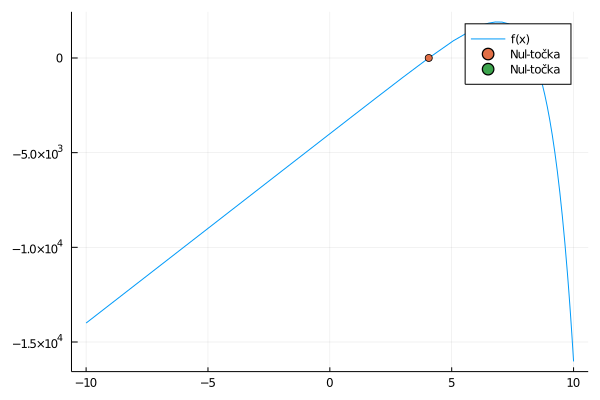

In [15]:
# Funkcija f₅(x)
Intervali₅=((0,5),(5,10))
NulTočke(f₅,a₅,b₅,Intervali₅)

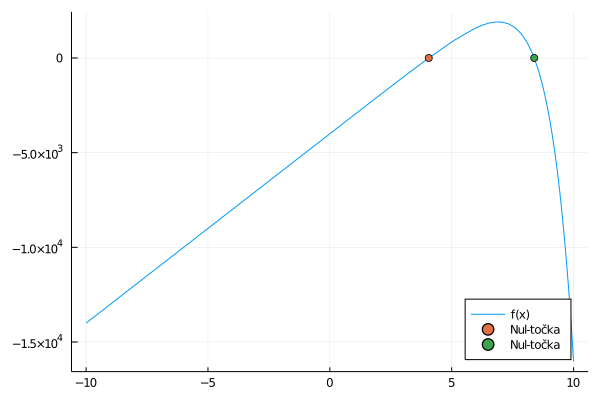

In [16]:
plot!(legend=:bottomright)

## Jednostavne iteracije

Rješavamo jednadžbu oblika 

$$
x=\varphi(x). \tag{2}
$$

__Teorem o fiksnoj točki.__ __(Banach)__
Neka je 

$$\varphi:[a,b]\to \mathbb{R}$$

__neprekidno derivabilna funkcija__ i neka vrijedi

\begin{align*}
\varphi(x) &\in [a,b] \quad  \forall x\in [a,b], \\
|\varphi'(x)|&\leq q<1 \quad \forall x\in(a,b) \tag{3}.
\end{align*}

Tada postoji jedinstvena __fiksna točka__ $\xi \in [a,b]$ za koju vrijedi
$\xi=\varphi(\xi)$. 

Nadalje, za proizvoljnu početnu točku  $x_0\in[a,b]$ niz 

$$
x_n=\varphi(x_{n-1}),\quad n=1,2,3,\ldots, 
$$

konvergira prema $\xi$ te vrijede __ocjene pogreške__:

\begin{align*}
|\xi-x_n|&\leq \displaystyle\frac{q^n}{1-q}|x_1-x_0|, \\
|\xi-x_n|&\leq \displaystyle\frac{q}{1-q}|x_n-x_{n-1}|, \\
|\xi-x_n|&\leq q|\xi-x_{n-1}|.
\end{align*}

Dakle, konvergencija je __linearna__.

Za dokaz teorema vidi [R. Scitovski, Numerička matematika, str. 73](https://www.mathos.unios.hr/nm/materijali/Num.PDF).

In [17]:
function Iteration(φ::Function,x::Number,ϵ::Float64=1e-10)
    ξ=φ(x)
    iter=0
    while abs(x-ξ)>ϵ && iter<1000
        x=ξ
        ξ=φ(x)
        iter+=1
    end
    ξ,iter
end

Iteration (generic function with 2 methods)

Za korištenje metode iteracije potrebno je
transformirati oblik (1) u oblik (2) i to tako da je ispunjen uvjet (3).

Za procjenu derivacije možemo koristiti paket `Calculus.jl` koji aproksimira derivaciju konačnim razlikama ili paket
[`ForwardDiff.jl`](https://github.com/JuliaDiff/ForwardDiff.jl) koji koristi [automatsku diferencijaciju](https://en.wikipedia.org/wiki/Automatic_differentiation) i koji je točniji. Može se koristiti i simboličko računanje pomoću paketa `SymPy.jl`.

In [18]:
using ForwardDiff

In [19]:
varinfo(ForwardDiff.ForwardDiff)

| name        |        size | summary |
|:----------- | -----------:|:------- |
| DiffResults | 139.491 KiB | Module  |
| ForwardDiff | 349.056 KiB | Module  |


### Primjer

Potražimo nul-točke funkcije $f_1(x)=e^x-x-\frac{5}{4}$. Iz oblika

$$
x=e^x-\frac{5}{4}\equiv \Phi(x)
$$

možemo izračunati samo negativnu nul-točku, jer je u okolini pozitivne nul-točke $|\varphi'(x)|>1$.
Za $x_0=1$, niz divergira vrlo brzo, a za $x_0=0.6$, što je blizu pozitivne nul-točke, 
niz konvergira prema negativnoj nul-točki, i to bez teoretskog obrazloženja.

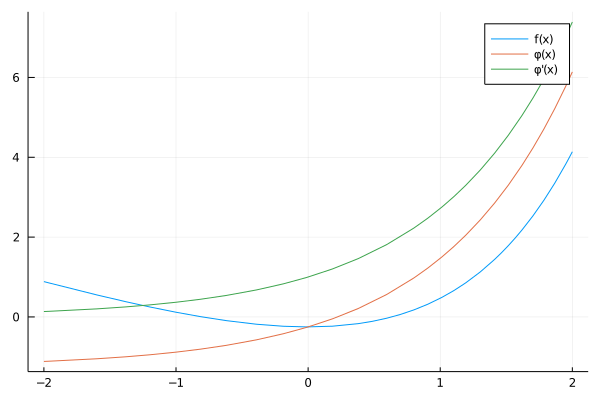

In [20]:
φ(x)=exp(x)-5.0/4
plot([f₁,φ,x->ForwardDiff.derivative(φ,x)],-2.0,2.0,label=["f(x)" "φ(x)" "φ'(x)"])

In [21]:
Iteration(φ,0.5)

(-0.8012179734751033, 33)

In [22]:
Iteration(φ,1.0)

(Inf, 5)

In [23]:
Iteration(φ,0.6)

(-0.8012179734638228, 35)

Pozitivnu nul-točku možemo izračunati iz prikaza

$$
x=\ln\big(x+\frac{5}{4}\big)\equiv \Psi(x).
$$

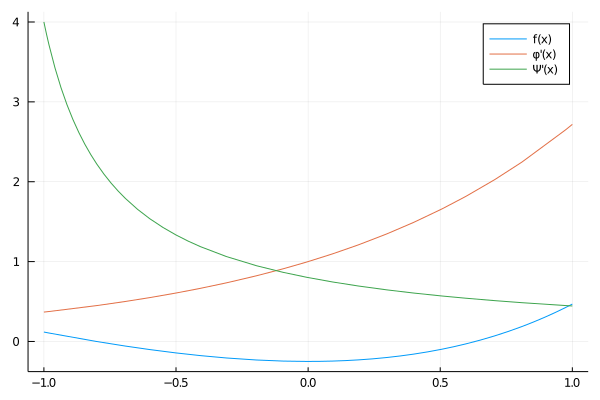

In [24]:
Ψ(x)=log(x+5.0/4)
plot([f₁,x->ForwardDiff.derivative(φ,x), x->ForwardDiff.derivative(Ψ,x)],
    -1.0,1.0,label=["f(x)" "φ'(x)" "Ψ'(x)"])

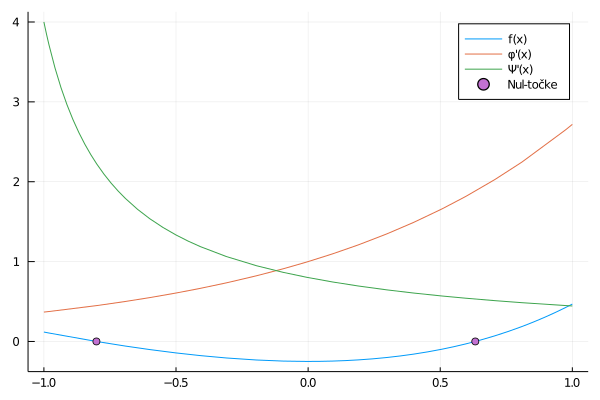

In [25]:
scatter!([Iteration(φ,-0.5)[1],Iteration(Ψ,1.0)[1]],[0,0],label="Nul-točke")

### Korijen iz 2

Izračunajmo približno $\sqrt(2)$, odnosno izračunajmo pozitivno rješenje jednadžbe 

$$
x^2-2=0.
$$

Jednadžbu je moguće pretvoriti u oblik (2) kao 

$$
x=\frac{2}{x},
$$

no tada je $\varphi'(x)=-\displaystyle\frac{2}{x^2}$ pa na intervalu $[1,2]$ ne vrijedi (3). Zato stavimo

$$
\frac{x}{2}=\frac{1}{x},
$$

odnosno

$$
x=\frac{x}{2}+\frac{1}{x}=\frac{1}{2}\left(x+\frac{2}{x}\right)\equiv\varphi(x).
$$

Točna vrijednost se postiže nakon samo 4 iteracije!

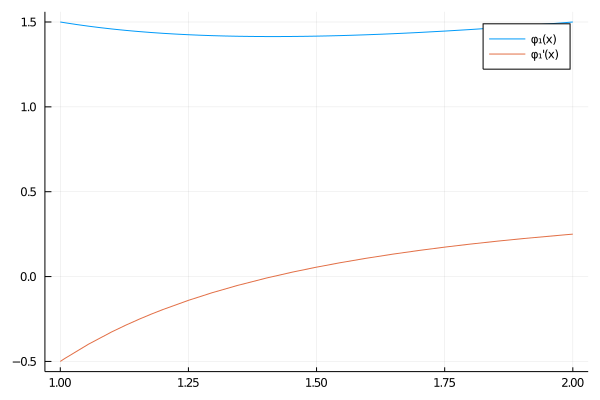

In [26]:
φ₁(x)=(x+2.0/x)/2.0
plot([φ₁,x->ForwardDiff.derivative(φ₁,x)],1.0,2.0,label=["φ₁(x)" "φ₁'(x)"])

In [27]:
Iteration(φ₁,1.0,1e-15), sqrt(2)

((1.414213562373095, 5), 1.4142135623730951)

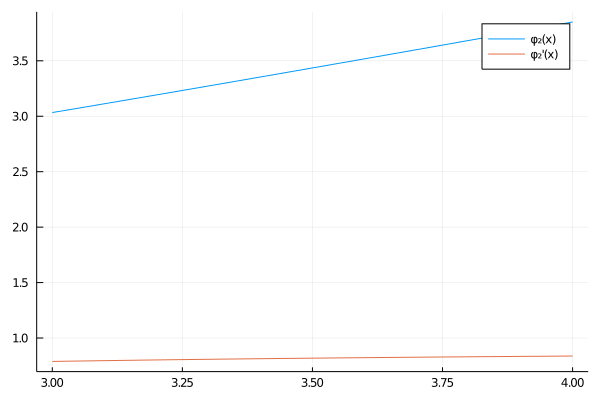

In [28]:
# Probajmo i sqrt(10)
φ₂(x)=(9x+10.0/x)/10.0
plot([φ₂,x->ForwardDiff.derivative(φ₂,x)],3.0,4.0,label=["φ₂(x)" "φ₂'(x)"])

In [29]:
Iteration(φ₂,3.0,1e-10), sqrt(10) # 1e-15

((3.1622776597958935, 88), 3.1622776601683795)

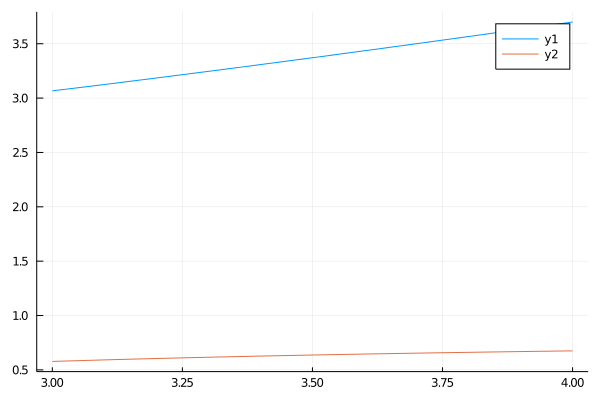

In [30]:
# Probajmo sqrt(10) na drugi način
φ₃(x)=(4x+10.0/x)/5.0
plot([φ₃,x->ForwardDiff.derivative(φ₃,x)],3.0,4.0)

In [31]:
Iteration(φ₃,3.0,1e-10), sqrt(10) # 1e-15

((3.162277660043792, 40), 3.1622776601683795)

## Newtonova metoda

__Newtonova metoda__ ili __metoda tangente__ temelji se na sljedećoj ideji: zadanu funkciju $f(x)$ u okolini zadane početne aproksimacije $x_0$ aproksimiramo tangentom kroz točku $(x_0,f(x_0))$,

$$
f_1(x)=f(x_0)+f'(x_0)(x-x_0),
$$

te za sljedeću aproksimaciju uzmemo sjecište tangente s $x$-osi. Na taj dobijemo niz aproksimacija:

$$
x_{n+1}=x_n-\frac{f(x_n)}{f'(x_n)},\quad n=0,1,2,\ldots  \tag{4}
$$

Vrijedi sljedeći

__Teorem.__  Neka je zadana funkcija $f:[a,b]\to \mathbb{R}$ za koju vrijedi:

* $f''$ je neprekidna na $(a,b)$,
* $f(a)\cdot f(b)<0$,
* $f'$ i $f''$ imaju stalan predznak na $(a,b)$, i 
* $f(x_0)\cdot f''(x_0)>0$ za odabranu početnu aproksimaciju $x_0\in [a,b]$.

Tada niz (4) konvergira prema __jedinstvenom__ rješenju $\xi$ jednadžbe $f(x)=0$. 
Pri tome vrijede __ocjene pogreške__:

\begin{align*}
|\xi-x_n|&\leq \displaystyle\frac{M_2}{2m_1}(x_n-x_{n-1})^2, \\
|\xi-x_{n+1}|&\leq \displaystyle\frac{M_2}{2m_1}(\xi-x_{n})^2, \\
\end{align*}

gdje je 

$$
M_2=\max_{x\in(a,b)}|f''(x)|,\quad
m_1=\min_{x\in(a,b)}|f'(x)|.
$$

Dakle, konvergencija je __kvadratična__.

In [32]:
function Newton(f::Function,x::Number,ϵ::Float64=1e-10)
    ξ=x-f(x)/(x->ForwardDiff.derivative(f,x))(x)
    iter=0
    while abs(x-ξ)>ϵ && iter<100
        x=ξ
        ξ=x-f(x)/(x->ForwardDiff.derivative(f,x))(x)
        iter+=1
    end
    ξ,iter
end

Newton (generic function with 2 methods)

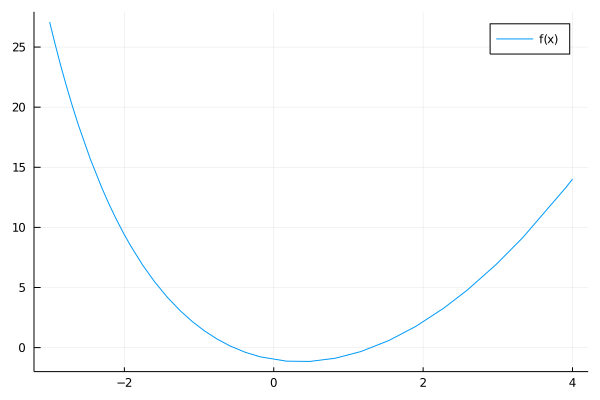

In [33]:
f₆(x)=exp(-x)+x^2-2
plot(f₆,-3,4,label="f(x)")

Provjerimo uvjete teorema za pozitivnu nul-točku:

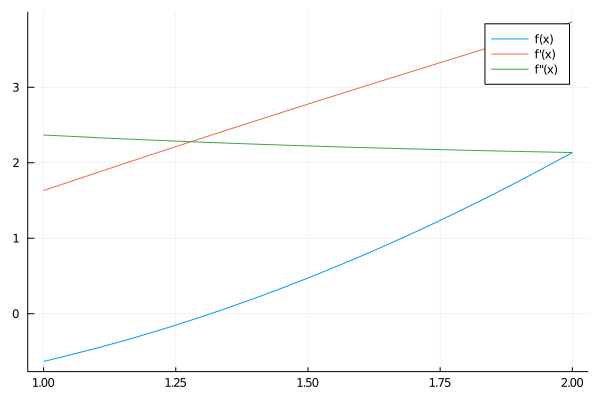

In [34]:
a=1
b=2
x₀=1.5
plot([f₆,x->ForwardDiff.derivative(f₆,x),
        x->ForwardDiff.derivative(x->ForwardDiff.derivative(f₆,x),x)],a,b, 
    label=["f(x)" "f'(x)" "f''(x)"])

In [35]:
f₆(a)*f₆(b)<0, 
f₆(x₀)*(x->ForwardDiff.derivative(
        x->ForwardDiff.derivative(f₆,x),x))(x₀)>0

(true, true)

In [36]:
Newton(f₆,x₀) # 1e-15

(1.3159737777962903, 4)

In [37]:
# Negativna nul-točka
a=-1
b=0
x₁=-1.0
f₆(a)*f₆(b)<0, 
f₆(x₁)*(x->ForwardDiff.derivative(
        x->ForwardDiff.derivative(f₆,x),x))(x₁)>0

(true, true)

In [38]:
Newton(f₆,x₁)

(-0.5372744491738566, 5)

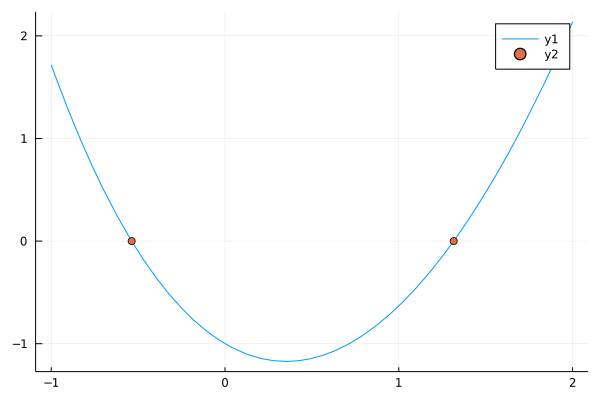

In [39]:
plot(f₆,-1.0,2)
scatter!([Newton(f₆,x₀)[1],Newton(f₆,x₁)[1]],[0,0])

__Napomena.__ Ukoliko za početne aproksimacije odaberemo vrijednosti $x_0=1$, odnosno $x_0=0$, metoda će također konvergirati prema željenim nul-točkama, premda bez teoretskog obrazloženja: 

In [40]:
Newton(f₆,1)

(1.31597377779629, 4)

In [41]:
Newton(f₆,0)

(-0.5372744491738566, 6)

## Metoda sekante

Ukoliko u formuli (4) derivaciju $f'(x_n)$ aproksimiramo konačnom razlikom (sekantom) kroz __dvije__ prethodne točke,

$$
f'(x_n)\approx \frac{f(x_n)-f(x_{n-1})}{x_n-x_{n-1}}, 
$$

dobit ćemo niz

$$
x_{n+1}=\frac{x_{n-1}f(x_n)-x_nf(x_{n-1})}{f(x_n)-f(x_{n-1})},\qquad f(x_n)\neq f(x_{n-1}), \quad n=1,2,3,\ldots.
$$

Na početku trebamo odabrati _dvije_ početne aproksimacije, $x_0,x_1\in[a,b]$. Svojstva konvergencije su slična onima Newtonove metode.

In [42]:
function Sekanta(f::Function,x::Number,ζ::Number,ϵ::Float64=1e-10)
    ξ=(x*f(ζ)-ζ*f(x))/(f(ζ)-f(x))
    iter=0
    while abs(ζ-ξ)>ϵ && iter<100
        x=ζ
        ζ=ξ
        ξ=(x*f(ζ)-ζ*f(x))/(f(ζ)-f(x))
        iter+=1
    end
    ξ,iter
end

Sekanta (generic function with 2 methods)

In [43]:
Sekanta(f₆,-1,0), Sekanta(f₆,1,2)

((-0.5372744491738566, 7), (1.3159737777962903, 6))